# Рабочая тетрадь № 6

## Теоретический материал – Эволюционные методы
Эволюционные методы относятся к числу эффективных средств
решения задач оптимизации и структурного синтеза проектных решений.
Они основаны на использовании принципов оптимального приспособления
организмов в живой природе к условиям окружающей среды. К числу
эволюционных относятся методы генетические, колонии муравьев,
поведения толпы. Наиболее развиты и востребованы в настоящее время
генетические алгоритмы. По мере развития техники и технологий растет
доля сложных задач проектирования и управления, для решения которых
применение традиционных методов проблематично. Поэтому все большее
внимание уделяется применению методов искусственного интеллекта.
Генетические алгоритмы Для применения ГА необходимо:
1. выделить совокупность свойств объекта, характеризуемых
внутренними параметрами и влияющих на его полезность, т.е. выделить
множество управляемых параметров $X=(x_{1},x_{2},…,x_{n})$ среди $x_{i}$ могут
быть величины различных типов (real, integer, Boolean, enumeration). Наличие нечисловых величин (enumeration) обусловливает возможность
решения задач не только параметрической, но и структурной оптимизации;
2. сформулировать количественную оценку полезности вариантов
объекта — функцию полезности F. Если в исходном виде задача
многокритериальна, то такая формулировка означает выбор скалярного
(обобщенного) критерия;
3. представить вектор X в форме хромосомы — записи
следующего вида:
<p align="center">
  <img src="misc/6_1.png">
</p>

Этапы генетического алгоритма могут быть представлены в следующем виде:
```
for (k=0; k<G; k++)
{ for (j=0; j<N; j++)
  { Выбор родительской пары хромосом;
    Кроссовер;
    Мутации;
    Оценка функции полезности F потомков;
    Селекция;
  }
  Замена текущего поколения новым;
}
``` 

### 1.1.1 Пример
Задача: Пусть дана начальная популяция из четырех хромосом с двумя
генами x и y. Показатель качества хромосомы оценивается функцией Z.
При равном качестве хромосом предпочтение отдается хромосоме с
большим номером. На каждом этапе хромосома a с высшим качеством
порождает четыре новых хромосомы 𝑏1, 𝑐1, 𝑏2, 𝑐2, обмениваясь генами с
двумя хромосомами b и c более низкого качества по указанной схеме:

<p align="center">
  <img src="misc/6_2.png">
</p>

Последняя хромоcома (с низшим качеством) выбывает из
популяции. Найти максимальный показатель качества хромосомы в
популяции и общее качество популяции после четырех этапов эволюции.

Потребуется несколько функций для реализации алгоритма. Напишем их.  

In [3]:
# функция качества хромосомы
def qZ(x, y):
  return (x - 3 * y + 1) / (3 * x ** 2 + 3 * y ** 2 + 1)

# сумма качества хромосом
def qSumZ(Z):
  return sum(Z)

# программирование представленной выше схемы обмена хромосо
def exchangeScheme(oldX, oldY, sortedId):
  x = [0 for i in range(4)]
  y = [0 for i in range(4)]
  
  x[2] = oldX[sortedId[2]]
  x[3] = oldX[sortedId[2]]
  
  x[0] = oldX[sortedId[0]]
  
  x[1] = oldX[sortedId[1]]
  
  y[0] = oldY[sortedId[2]]
  y[1] = oldY[sortedId[2]]
  
  y[2] = oldY[sortedId[0]]
  
  y[3] = oldY[sortedId[1]]
  
  return x, y

# сортировка массива качества наших потомков и выделение полученных индексов
def sorting(Z):
  sortedId = sorted(range(len(Z)), key=lambda k: Z[k])
  return sortedId

# функция для шага эволюции
def evoStep(x, y, z):
  _, minId = min((value, id) for (id, value) in enumerate(z))
  x = x[:]
  y = y[:]
  z = z[:]
  
  x.pop(minId)
  y.pop(minId)
  z.pop(minId)
  
  return x, y, z

# шаги эволюции (конечная функция), по умолчанию 4 шага
def evoSteps(x, y, steps_num=4):
  results = []
  
  for i in range(steps_num):
    arrZ = [qZ(k, y[i]) for i, k in enumerate(x)]
      
    x, y, z = evoStep(x, y, arrZ)
      
    x, y = exchangeScheme(x, y, sorting(z))
      
    results.append([x, y, qSumZ(arrZ), arrZ])
  
  return x, y, results

Теперь, когда мы подготовились к решению задачи, написав все
необходимые функции для реализации генетического алгоритма (оценки
качества хромосом, сортировки потомков и эволюционных шагов), решим
задачу в числах. Пусть даны следующие массивы хромосом X и Y:

<p align="center">
  <img src="misc/6_3.png">
</p>

Запишем их в требуемом виде и воспользуемся написанной функцией
evoSteps.

In [4]:
# объявление массивов хромосом
X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]

# реализация алгоритма
results = evoSteps(X, Y)

Теперь, выведем полученные значения для показателя качества хромосомы
в популяции и общее качество популяции после четырех этапов эволюции.
Для этого, воспользуемся циклом по значениям переменной results.

In [5]:
for i in range(len(results[2])):
  print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
  qualityArrZ += results[2][i][3]

print(f'max Z: {max(qualityArrZ)}')

max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z: 1.0


### Задание
Выполните по вариантам соответственно реализацию генетического
алгоритма в соответствии с приложенными начальными данными (вариант 7)

<p align="center">
  <img src="misc/6_4.png">
</p>

In [6]:
# функция качества хромосомы
def qZ(x, y):
  return (x + 3 * y - 3) / (3 * x ** 2 + 3 * y ** 2 + 1)

# сумма качества хромосо
def qSumZ(Z):
  return sum(Z)

# программирование представленной выше схемы обмена хромосо
def exchangeScheme(oldX, oldY, sortedId):
  x = [0 for i in range(4)]
  y = [0 for i in range(4)]
  
  x[2] = oldX[sortedId[2]]
  x[3] = oldX[sortedId[2]]
  
  x[0] = oldX[sortedId[0]]
  
  x[1] = oldX[sortedId[1]]
  
  y[0] = oldY[sortedId[2]]
  y[1] = oldY[sortedId[2]]
  
  y[2] = oldY[sortedId[0]]
  
  y[3] = oldY[sortedId[1]]
  
  return x, y

# сортировка массива качества наших потомков и выделение полученных индексов
def sorting(Z):
  sortedId = sorted(range(len(Z)), key=lambda k: Z[k])
  return sortedId

# функция для шага эволюции
def evoStep(x, y, z):
  _, minId = min((value, id) for (id, value) in enumerate(z))
  x = x[:]
  y = y[:]
  z = z[:]
  
  x.pop(minId)
  y.pop(minId)
  z.pop(minId)
  
  return x, y, z

# шаги эволюции (конечная функция), по умолчанию 4 шага
def evoSteps(x, y, steps_num=4):
  results = []
  
  for i in range(steps_num):
    arrZ = [qZ(k, y[i]) for i, k in enumerate(x)]
    x, y, z = evoStep(x, y, arrZ)
    x, y = exchangeScheme(x, y, sorting(z))
    results.append([x, y, qSumZ(arrZ), arrZ])
  
  return x, y, results

# объявление массивов хромосом
X = [5, -3, -2, 0]
Y = [-1, -2, 0, 1]

# реализация алгоритма
results = evoSteps(X, Y)

for i in range(len(results[2])):
  print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
  qualityArrZ += results[2][i][3]

print(f'max Z: {max(qualityArrZ)}')

max_1_step: -0.697273612463486
max_2_step: -2.225790746615573
max_3_step: -0.0789375997624262
max_4_step: 0.08112773302646721
max Z: 0.06329113924050633


## 1.2. Теоретический материал – Метод имитации отжига
Алгоритм отжига – это метод оптимизации, который называется
отжигом, или симуляцией восстановления (Simulated annealing). Как ясно из
названия, метод поиска моделирует процесс восстановления.
Восстановление – это физический процесс, который заключается в нагреве
и последующем контролируемом охлаждении субстанции. В результате
получается прочная кристаллическая структура, которая отличается от
структуры с дефектами, образующейся при быстром беспорядочном
охлаждении. Структура здесь представляет собой кодированное решение, а
температура используется для того, чтобы указать, как и когда будут
приниматься новые решения.  
Алгоритм имитации отжига включает следующие этапы: 

<p align="center">
  <img src="misc/6_5.png">
</p>

Метод отжига может быть эффективным при решении задач
различных классов, требующих оптимизации. Ниже приводится их краткий
список:

1. создание пути;
2. реконструкция изображения;
3. назначение задач и планирование;
4. размещение сети;
5. глобальная маршрутизация;
6. обнаружение и распознавание визуальных объектов;
7. разработка специальных цифровых фильтров.  

Поскольку метод отжига представляет собой процесс генерации
случайных чисел, поиск решения с использованием данного алгоритма
может занять значительное время. В некоторых случаях алгоритм вообще не
находит решение или выбирает не самое оптимальное. Алгоритм отжига как
способ выполнения процедур поиска и оптимизации. Данный метод является
аналогом процесса нагревания тела до состояния плавления с последующим
постепенным охлаждением. При высоких температурах поиск ведется по
всему диапазону. При снижении температуры диапазон поиска уменьшается
до небольшой области вокруг текущего решения.  

Рассмотрим решение задачи поиска оптимального маршрута на графе
методом имитации отжига Для этого, представим формальную постановку
задачи и рассмотрим пример, который иллюстрирует алгоритм решения.  

Итак, необходимо Найти длину гамильтонова цикла $S_{4}$ в полном графе $K_{6}$  после четырех циклов решения задачи методом отжига. Даны расстояния $L_{i, j}$ между вершинами. Даны также: начальная последовательность вершин $L{0}$ последовательность замен вершин $Z$ и выпавшие при этом вероятности
перехода $P_{k}, k = 1, ..., 4$.  

Переход на худшее $(\Delta S_{k} = S_{k} - S_{k-1} > 0)$ решение допустим, если $P_{*} = 100$, где снижения температуры происходит по закону $T_{k+1} = 0.5T_{k}$ от $T_{1} = 100$.

### 1.2.1 Пример
#### Задача: Итак, начальные условия задачи представляют собой следующий граф с расстояниями между ребрами:

<p align="center">
  <img src="misc/6_6.png">
</p>

Рассмотрим решение с применением Python. Импортируем библиотеки:

In [9]:
import networkx as nx
from math import e

Далее, опишем массив длин ребер, последовательности прохождение
вершин на маршруте и их замены, значения P, а также начальную
температуру:

In [10]:
distances = [(1, 2, 20),
            (1, 3, 40),
            (1, 4, 42), 
            (1, 5, 33),
            (1, 6, 21),
            (2, 3, 26),
            (2, 4, 38),
            (2, 5, 42),
            (2, 6, 17),
            (3, 4, 22),
            (3, 5, 43),
            (3, 6, 21),
            (4, 5, 27),
            (4, 6, 22),
            (5, 6, 26)] #длины рёбер

V = [1, 4, 5, 2, 6, 3, 1] #последовательность прохождения маршрута
Z = [(3, 4),
    (4, 6),
    (5, 2),
    (6, 2)] #последовательность замен вершин
P = [49, 54, 43, 54] #случайные числа, выпавшие в процессе счёта

T = 100 #начальная температура

Запишем функции вероятности и изменения температуры:

In [12]:
#функция вероятности
def probability(delta, T):
    return 100 * e ** (-delta / T)

#функция изменения температуры
def reductTemp(prevT):
    nextT = .5 * prevT
    return nextT

Построим граф по заданным вершинам, как в начальном условии:

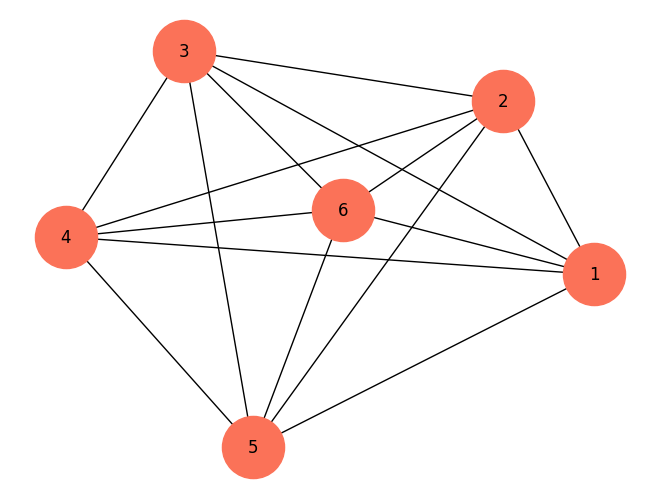

In [13]:
graph = nx.Graph() #создание пустого графа
graph.add_weighted_edges_from(distances) #добавление весов рёбер

#отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)


Теперь, напишем необходимые, согласно алгоритму выше, функции для
работы метода имитации отжига. Вычислим длину ребра:

In [15]:
#вычисление длины ребра
def edgeLength(i, j, distances, roundTrip=True):
  if roundTrip:
    return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                  for item in distances])
  else:
    return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

Вычислим длину маршрута:

In [16]:
#вычисление длины маршрута
def routeLength(V, distances):
  edges = []
  
  for i in range(len(V) - 1):
    edges.append(edgeLength(V[i], V[i + 1], distances))
  
  return sum(edges)

Запишем функцию для однократной перестановки в пути:

In [17]:
#одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName=True):
  decrement = 1 if replacementByName else 0
  
  arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
  
  return arrV

А теперь функцию, для реализации непосредственно самой перестановки:

In [18]:
#перестановка в пути
def routeReplacement(V, Z):
  for z in Z:
    V = routeOneReplacement(V, z)
  return V

Теперь, опишем алгоритм выбора подходящего пути методом отжига:

In [19]:
#выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
  sumLength = routeLength(V, distances) #нахождение длины пути
  arrSum = [sumLength] #массив сумм длин
  
  #циклы методом отжига
  for i in range(len(Z)):
    newV = routeOneReplacement(V[:], Z[i]) #новый маршрут после перестановки
    newS = routeLength(newV, distances) #длина нового маршрута
    arrSum.append(newS)
    deltaS = newS - sumLength #разница между длиной нового и старого маршрутов
    
    #в случае, если разница между длинами больше 0, то вычисляется вероятность
    if deltaS > 0:
      p = probability(deltaS, T) #подсчёт вероятности
      
      #если заданная вероятность попадает в интервал от 0 до p, то новый маршрут выбирается
      if p > P[i]:
        V = newV
        sumLength = newS
    else:
      V = newV
      sumLength = newS
        
    T = reductTemp(T) #вычисление температуры
  
  return V, arrSum


И нарисуем наш граф, отвечающий заданному маршруту:

In [20]:
#отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
  newDistances = []
  #прохождение по вектору
  for i in range(len(bestRoute) - 1):
    for distance in distances:
      if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
          newDistances.append(distance)
  
  graph = nx.Graph() #создание пустого графа
  
  graph.add_weighted_edges_from(newDistances) #добавление весов рёбер
  #отрисовка графа с заданными вершинами
  nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

И, наконец, рассчитаем наилучший маршрут и его длину:

Лучший выбранный маршрут: [1, 6, 2, 3, 4, 5, 1]
Длина лучшего выбранного маршрута: 146
Длины всех рассмотренных маршрутов: [189, 209, 186, 146, 166]


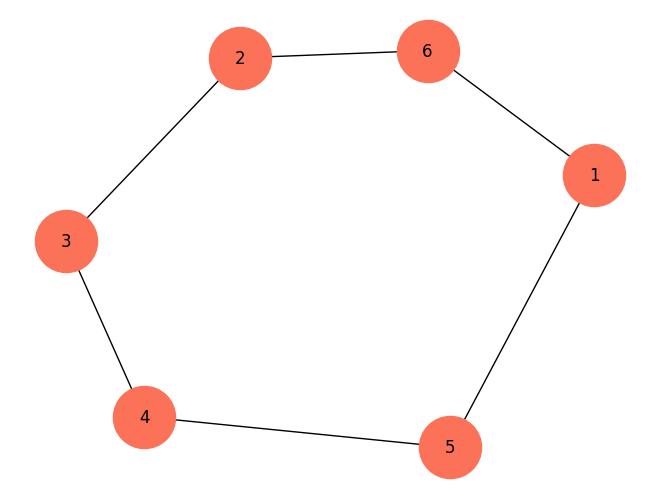

In [21]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) #отрисовка лучшего маршрута

### Задание
#### Задача: Найти длину гамильтонова цикла S4 в полном графе K6 после четырех циклов решения задачи методом отжига по вариантам ниже.

Вариант 7:
<p align="center">
  <img src="misc/6_7.png">
</p>

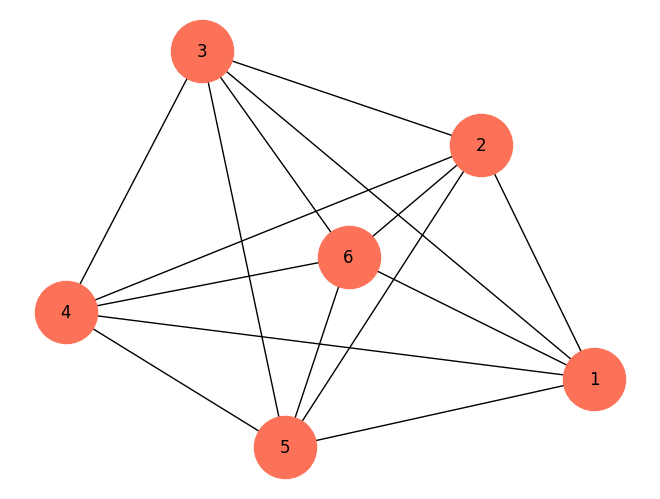

In [22]:
import networkx as nx
from math import e

distances = [(1, 2, 24),
            (1, 3, 41),
            (1, 4, 36), 
            (1, 5, 22),
            (1, 6, 21),
            (2, 3, 21),
            (2, 4, 33),
            (2, 5, 33),
            (2, 6, 14),
            (3, 4, 27),
            (3, 5, 39),
            (3, 6, 23),
            (4, 5, 20),
            (4, 6, 20),
            (5, 6, 19)]

V = [1, 3, 4, 5, 6, 2, 1]
Z = [(3, 4),
    (4, 6),
    (5, 2),
    (6, 2)]
P = [33, 82, 51, 76]

T = 100

def probability(delta, T):
    return 100 * e ** (-delta / T)

def reductTemp(prevT):
    nextT = .5 * prevT
    return nextT

graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

Лучший выбранный маршрут: [1, 6, 5, 4, 3, 2, 1]
Длина лучшего выбранного маршрута: 132
Длины всех рассмотренных маршрутов: [145, 158, 183, 132, 148]


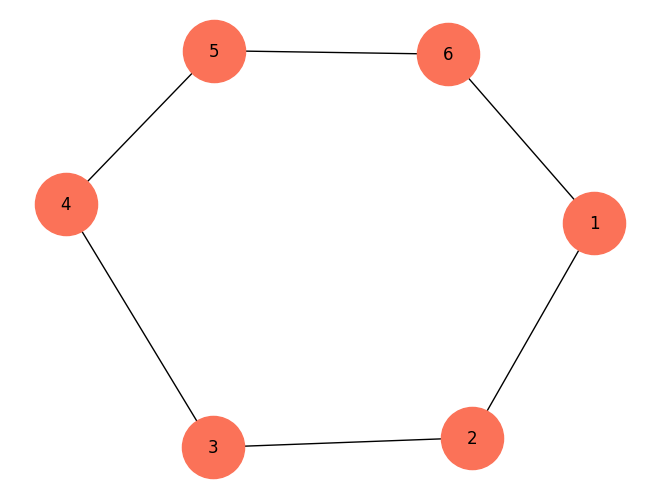

In [23]:
def edgeLength(i, j, distances, roundTrip=True):
  if roundTrip:
    return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                  for item in distances])
  else:
    return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
  
def routeLength(V, distances):
  edges = []
  
  for i in range(len(V) - 1):
    edges.append(edgeLength(V[i], V[i + 1], distances))
  
  return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName=True):
  decrement = 1 if replacementByName else 0
  
  arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
  
  return arrV

def routeReplacement(V, Z):
  for z in Z:
    V = routeOneReplacement(V, z)
  return V

def chooseRoute(distances, V, Z, T, P):
  sumLength = routeLength(V, distances)
  arrSum = [sumLength]
  
  for i in range(len(Z)):
    newV = routeOneReplacement(V[:], Z[i])
    newS = routeLength(newV, distances)
    arrSum.append(newS)
    deltaS = newS - sumLength
    
    if deltaS > 0:
      p = probability(deltaS, T)
      
      if p > P[i]:
        V = newV
        sumLength = newS
    else:
      V = newV
      sumLength = newS
        
    T = reductTemp(T)
  
  return V, arrSum

def drawRouteGraph(distances, bestRoute):
  newDistances = []
  for i in range(len(bestRoute) - 1):
    for distance in distances:
      if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
          newDistances.append(distance)
  
  graph = nx.Graph()
  
  graph.add_weighted_edges_from(newDistances)
  nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)

### Задание*
На решенном уже примере поэкспериментируйте с показателем S,
проанализируйте результаты.

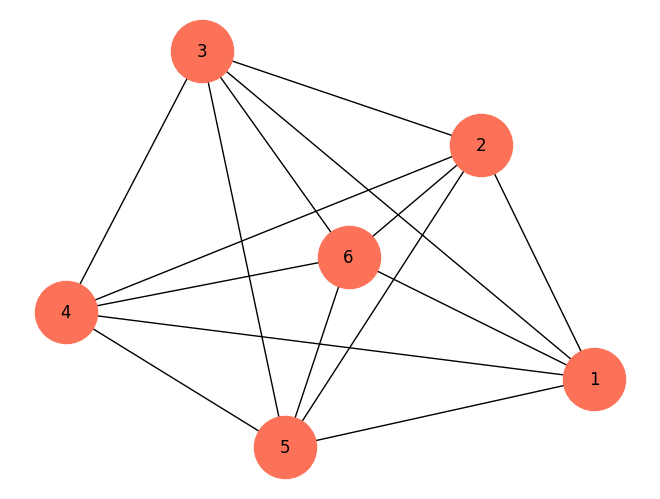

In [30]:
# увеличиваем значения (уменьшаем вероятность принятия нового маршрута)
import networkx as nx
from math import e

distances = [(1, 2, 24),
            (1, 3, 41),
            (1, 4, 36), 
            (1, 5, 22),
            (1, 6, 21),
            (2, 3, 21),
            (2, 4, 33),
            (2, 5, 33),
            (2, 6, 14),
            (3, 4, 27),
            (3, 5, 39),
            (3, 6, 23),
            (4, 5, 20),
            (4, 6, 20),
            (5, 6, 19)]

V = [1, 3, 4, 5, 6, 2, 1]
Z = [(3, 4),
    (4, 6),
    (5, 2),
    (6, 2)]
P = [99, 132, 234, 89]

T = 100

def probability(delta, T):
    return 100 * e ** (-delta / T)

def reductTemp(prevT):
    nextT = .5 * prevT
    return nextT

graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

Лучший выбранный маршрут: [1, 6, 4, 5, 3, 2, 1]
Длина лучшего выбранного маршрута: 145
Длины всех рассмотренных маршрутов: [145, 158, 156, 145, 160]


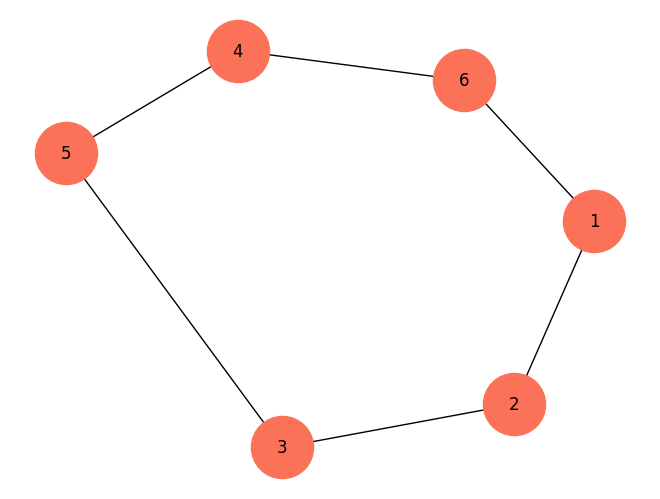

In [32]:
def edgeLength(i, j, distances, roundTrip=True):
  if roundTrip:
    return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                  for item in distances])
  else:
    return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
  
def routeLength(V, distances):
  edges = []
  
  for i in range(len(V) - 1):
    edges.append(edgeLength(V[i], V[i + 1], distances))
  
  return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName=True):
  decrement = 1 if replacementByName else 0
  
  arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
  
  return arrV

def routeReplacement(V, Z):
  for z in Z:
    V = routeOneReplacement(V, z)
  return V

def chooseRoute(distances, V, Z, T, P):
  sumLength = routeLength(V, distances)
  arrSum = [sumLength]
  
  for i in range(len(Z)):
    newV = routeOneReplacement(V[:], Z[i])
    newS = routeLength(newV, distances)
    arrSum.append(newS)
    deltaS = newS - sumLength
    
    if deltaS > 0:
      p = probability(deltaS, T)
      
      if p > P[i]:
        V = newV
        sumLength = newS
    else:
      V = newV
      sumLength = newS
        
    T = reductTemp(T)
  
  return V, arrSum

def drawRouteGraph(distances, bestRoute):
  newDistances = []
  for i in range(len(bestRoute) - 1):
    for distance in distances:
      if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
          newDistances.append(distance)
  
  graph = nx.Graph()
  
  graph.add_weighted_edges_from(newDistances)
  nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)

Маршрут получился другой, не нашелся более оптимальный - 132

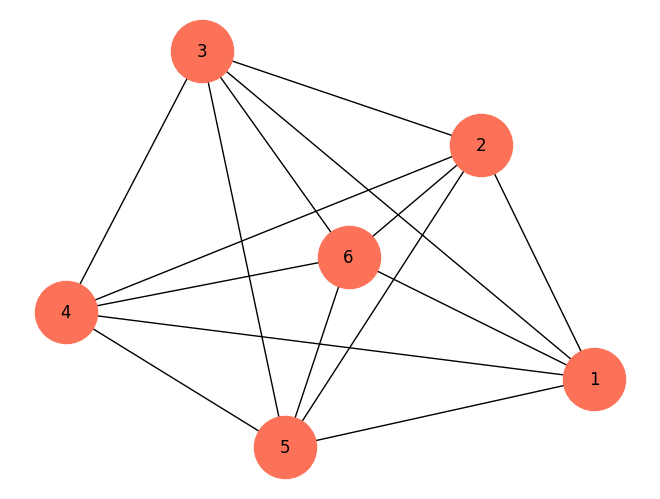

In [33]:
# уменьшаем значения (увеличиваем вероятность принятия нового маршрута)
import networkx as nx
from math import e

distances = [(1, 2, 24),
            (1, 3, 41),
            (1, 4, 36), 
            (1, 5, 22),
            (1, 6, 21),
            (2, 3, 21),
            (2, 4, 33),
            (2, 5, 33),
            (2, 6, 14),
            (3, 4, 27),
            (3, 5, 39),
            (3, 6, 23),
            (4, 5, 20),
            (4, 6, 20),
            (5, 6, 19)]

V = [1, 3, 4, 5, 6, 2, 1] 
Z = [(3, 4),
    (4, 6),
    (5, 2),
    (6, 2)]
P = [10, 3, 7, 1]

T = 100

def probability(delta, T):
    return 100 * e ** (-delta / T)

def reductTemp(prevT):
    nextT = .5 * prevT
    return nextT

graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

Лучший выбранный маршрут: [1, 4, 5, 2, 3, 6, 1]
Длина лучшего выбранного маршрута: 154
Длины всех рассмотренных маршрутов: [145, 158, 183, 157, 154]


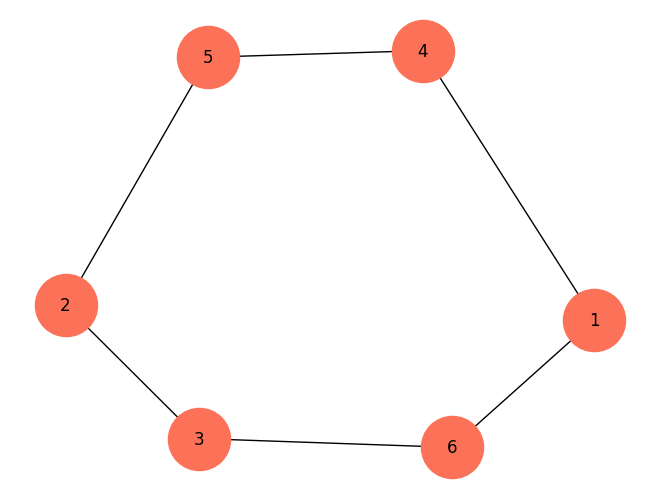

In [34]:
def edgeLength(i, j, distances, roundTrip=True):
  if roundTrip:
    return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                  for item in distances])
  else:
    return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

def routeLength(V, distances):
  edges = []
  
  for i in range(len(V) - 1):
    edges.append(edgeLength(V[i], V[i + 1], distances))
  
  return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName=True):
  decrement = 1 if replacementByName else 0
  
  arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
  
  return arrV

def routeReplacement(V, Z):
  for z in Z:
    V = routeOneReplacement(V, z)
  return V

def chooseRoute(distances, V, Z, T, P):
  sumLength = routeLength(V, distances)
  arrSum = [sumLength] 
  
  for i in range(len(Z)):
    newV = routeOneReplacement(V[:], Z[i])
    newS = routeLength(newV, distances)
    arrSum.append(newS)
    deltaS = newS - sumLength
    
    if deltaS > 0:
      p = probability(deltaS, T) 
      
      if p > P[i]:
        V = newV
        sumLength = newS
    else:
      V = newV
      sumLength = newS
        
    T = reductTemp(T) 
  
  return V, arrSum

def drawRouteGraph(distances, bestRoute):
  newDistances = []
  for i in range(len(bestRoute) - 1):
    for distance in distances:
      if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
          newDistances.append(distance)
  
  graph = nx.Graph()
  
  graph.add_weighted_edges_from(newDistances)
  nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)

Новые маршруты принимались слишком часто и ухудшили оптимальный вариант